<a href="https://colab.research.google.com/github/hyuna0926/ds-sa-cp2/blob/main/2%EC%9B%94%201%EC%9D%BC/fashion_campus_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trans_cus_pro = pd.read_csv('/content/drive/MyDrive/CP2_Phase2/trans_cus_pro.csv')

In [ ]:
created = trans_cus_pro['created_at'].apply(lambda x: x[0:7])
birth= trans_cus_pro['birthdate'].apply(lambda x: x[0:7])
join = trans_cus_pro['first_join_date'].apply(lambda x: x[0:7])

In [ ]:
trans_cus_pro['created_at']=created
trans_cus_pro['birthdate']=birth
trans_cus_pro['first_join_date']=join

In [ ]:
trans_cus_pro.to_csv('trans_cus_pro.csv')

### 데이터 경량화

In [ ]:
num_cols = [col for col in trans_cus_pro.columns if trans_cus_pro[col].dtype!='object']
cat_cols = [col for col in trans_cus_pro.columns if col not in num_cols]

In [ ]:
trans_cus_pro[cat_cols] = trans_cus_pro[cat_cols].astype('category')

In [ ]:
trans_cus_pro['year']=trans_cus_pro['year'].fillna(0)

In [ ]:
trans_cus_pro[num_cols] = trans_cus_pro[num_cols].astype('int32')

In [ ]:
trans_cus_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 27 columns):
 #   Column           Non-Null Count    Dtype   
---  ------           --------------    -----   
 0   Unnamed: 0       1254585 non-null  int32   
 1   created_at       1254585 non-null  category
 2   customer_id      1254585 non-null  int32   
 3   booking_id       1254585 non-null  category
 4   session_id       1254585 non-null  category
 5   payment_method   1254585 non-null  category
 6   payment_status   1254585 non-null  category
 7   promo_amount     1254585 non-null  int32   
 8   shipment_fee     1254585 non-null  int32   
 9   total_amount     1254585 non-null  int32   
 10  product_id       1254585 non-null  int32   
 11  quantity         1254585 non-null  int32   
 12  item_price       1254585 non-null  int32   
 13  gender_x         1254585 non-null  category
 14  birthdate        1254585 non-null  category
 15  device_type      1254585 non-null  category
 16  

## EDA

In [ ]:
sns.set_palette('Set3')

In [ ]:
df = trans_cus_pro.copy()

- 계절별 판매수

Text(0.5, 1.0, '<season sales>')

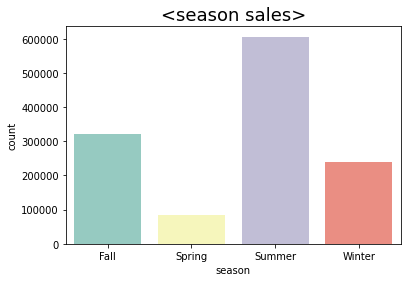

In [ ]:
sns.countplot(x='season',data=df)
plt.title('<season sales>',size=18)

- 판매날짜

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]), <a list of 74 Text major ticklabel objects>)

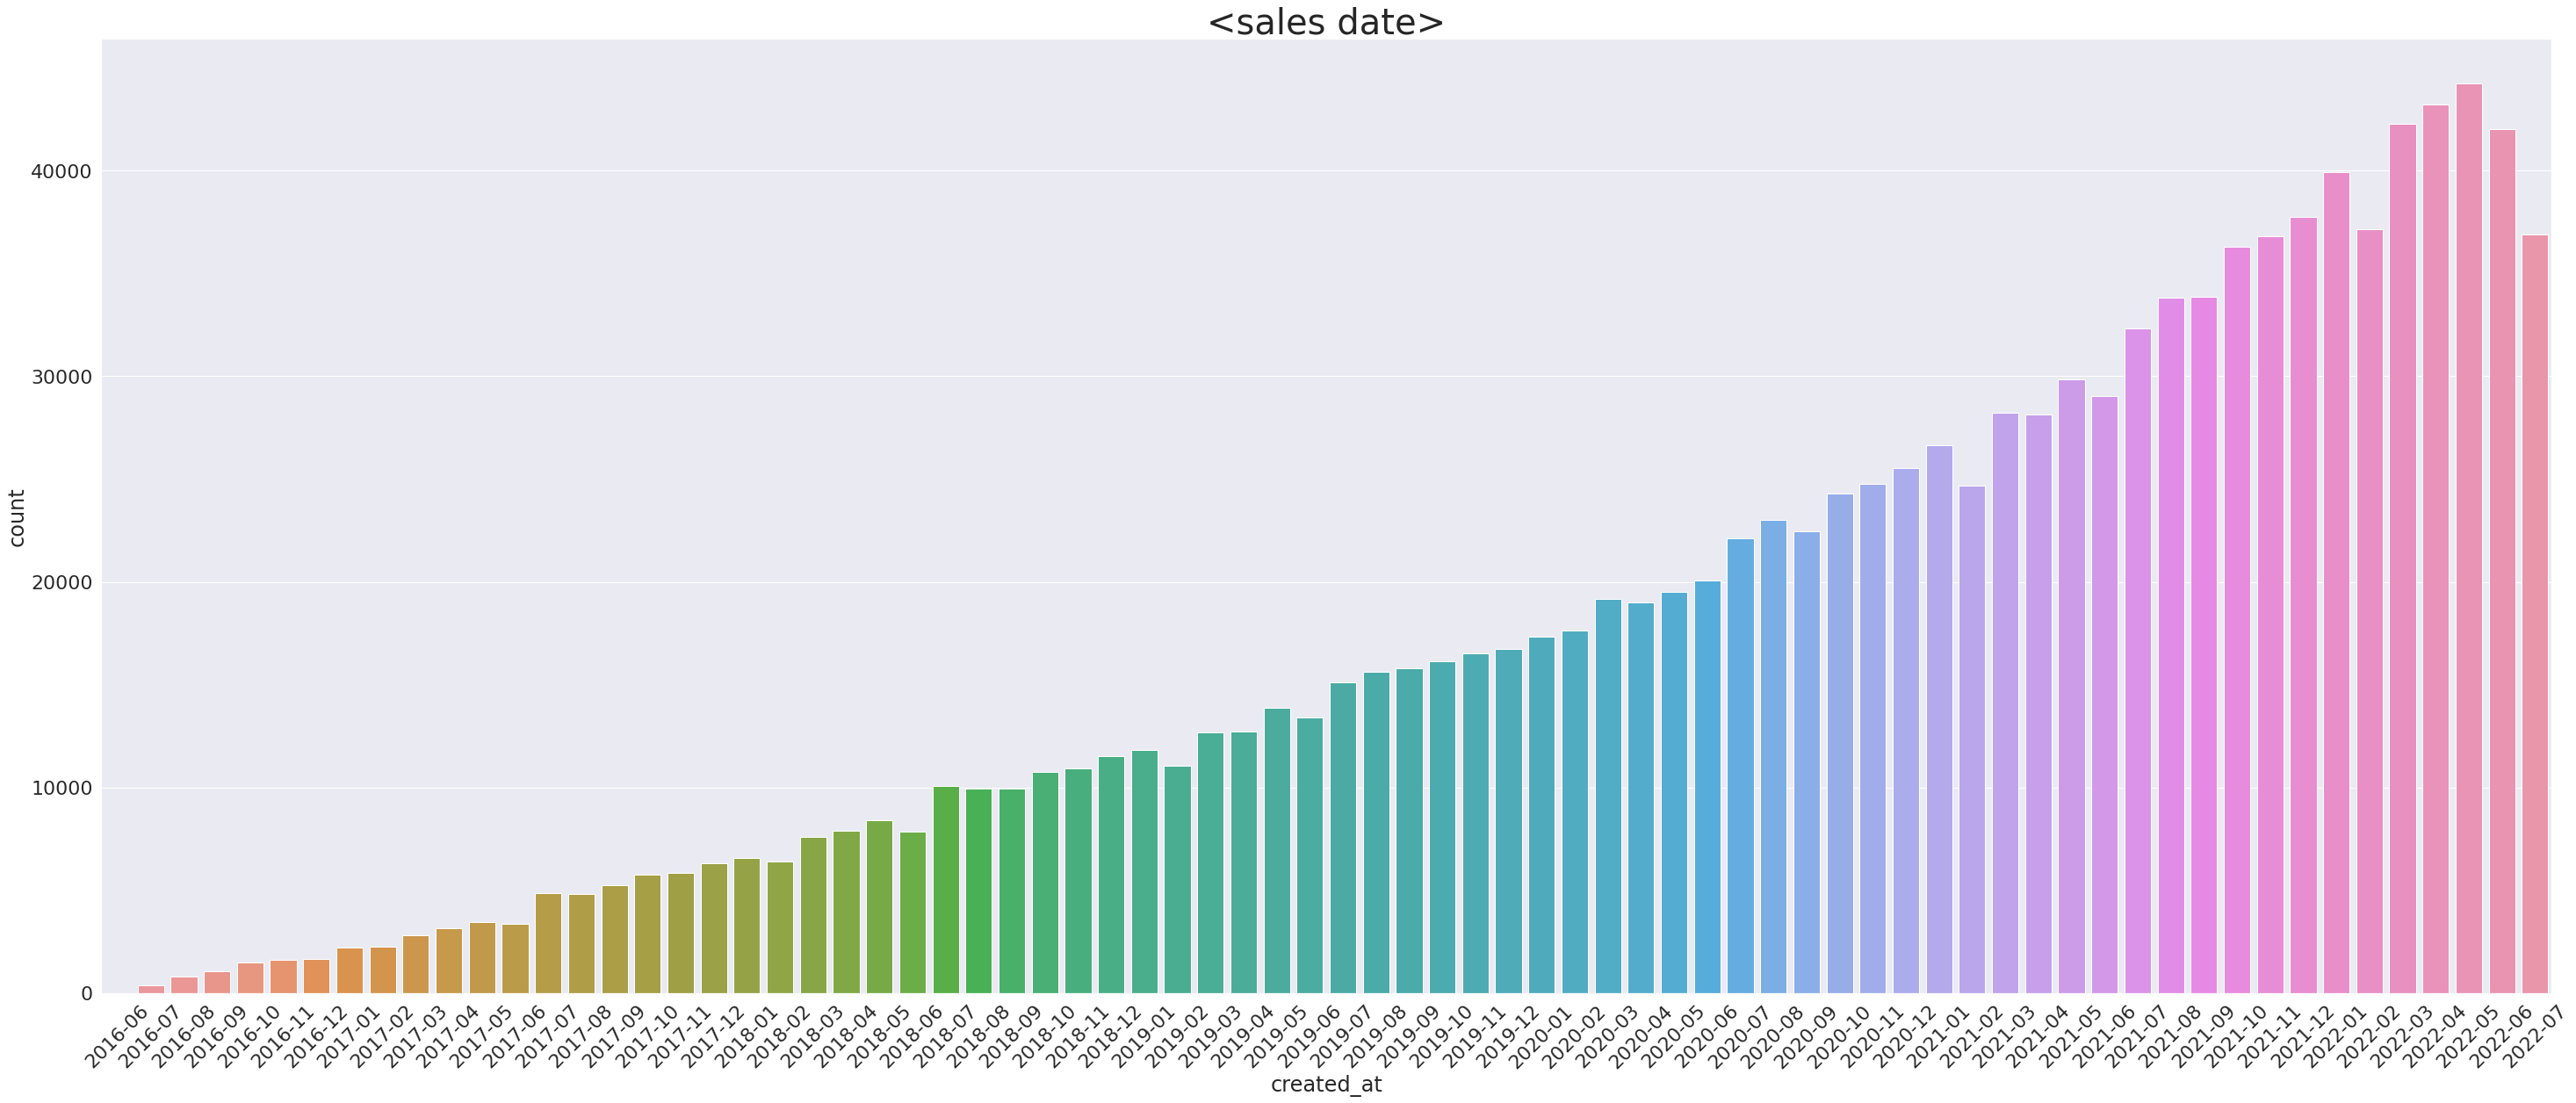

In [ ]:
sns.set(font_scale = 2)
plt.figure(figsize=(50,20))
sns.countplot(x='created_at',data=df)
plt.title('<sales date>',size=40)
plt.xticks(rotation=45)

- gender_x 성별 

In [ ]:
df['gender_x'].value_counts()

F    800114
M    454471
Name: gender_x, dtype: int64

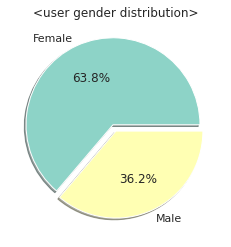

In [ ]:
sns.set(font_scale = 1)
sns.set_palette('Set3')
plt.pie(df['gender_x'].value_counts(),labels=['Female','Male'],autopct='%.1f%%',
        explode=[0.08,0],shadow=True)
plt.title('<user gender distribution>')
plt.show()

In [ ]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
created_at,2018-07,2021-01,2020-06,2019-02,2020-11
customer_id,5868,82831,47013,17135,70185
booking_id,186e2bee-0637-4710-8981-50c2d737bc42,81f60282-96c5-45f5-8a24-18e8111ccd08,a144e124-1ad6-425b-9f64-b01f05c697ff,e620a19d-982d-4fc2-9715-29fda7f42269,bbe1053a-9738-4438-bea4-0a3abcaf6afb
session_id,3abaa6ce-e320-4e51-9469-d9f3fa328e86,c7d4a5a2-362b-4042-a971-a55f84e0619f,141a3f3b-360e-4489-bc10-91528e9e1139,aadf43f6-59be-4b2f-9338-ccec0b2abf40,ae213ea2-c5bb-45aa-8a27-820d33c873aa
payment_method,Debit Card,OVO,Gopay,Credit Card,Gopay
payment_status,Success,Success,Success,Success,Success
promo_amount,1415,0,0,0,0
shipment_fee,10000,10000,10000,0,10000
total_amount,199832,232512,255159,263371,2413496


In [ ]:
birth = df['birthdate'].apply(lambda x:x[0:4]).astype('int32')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text major ticklabel objects>)

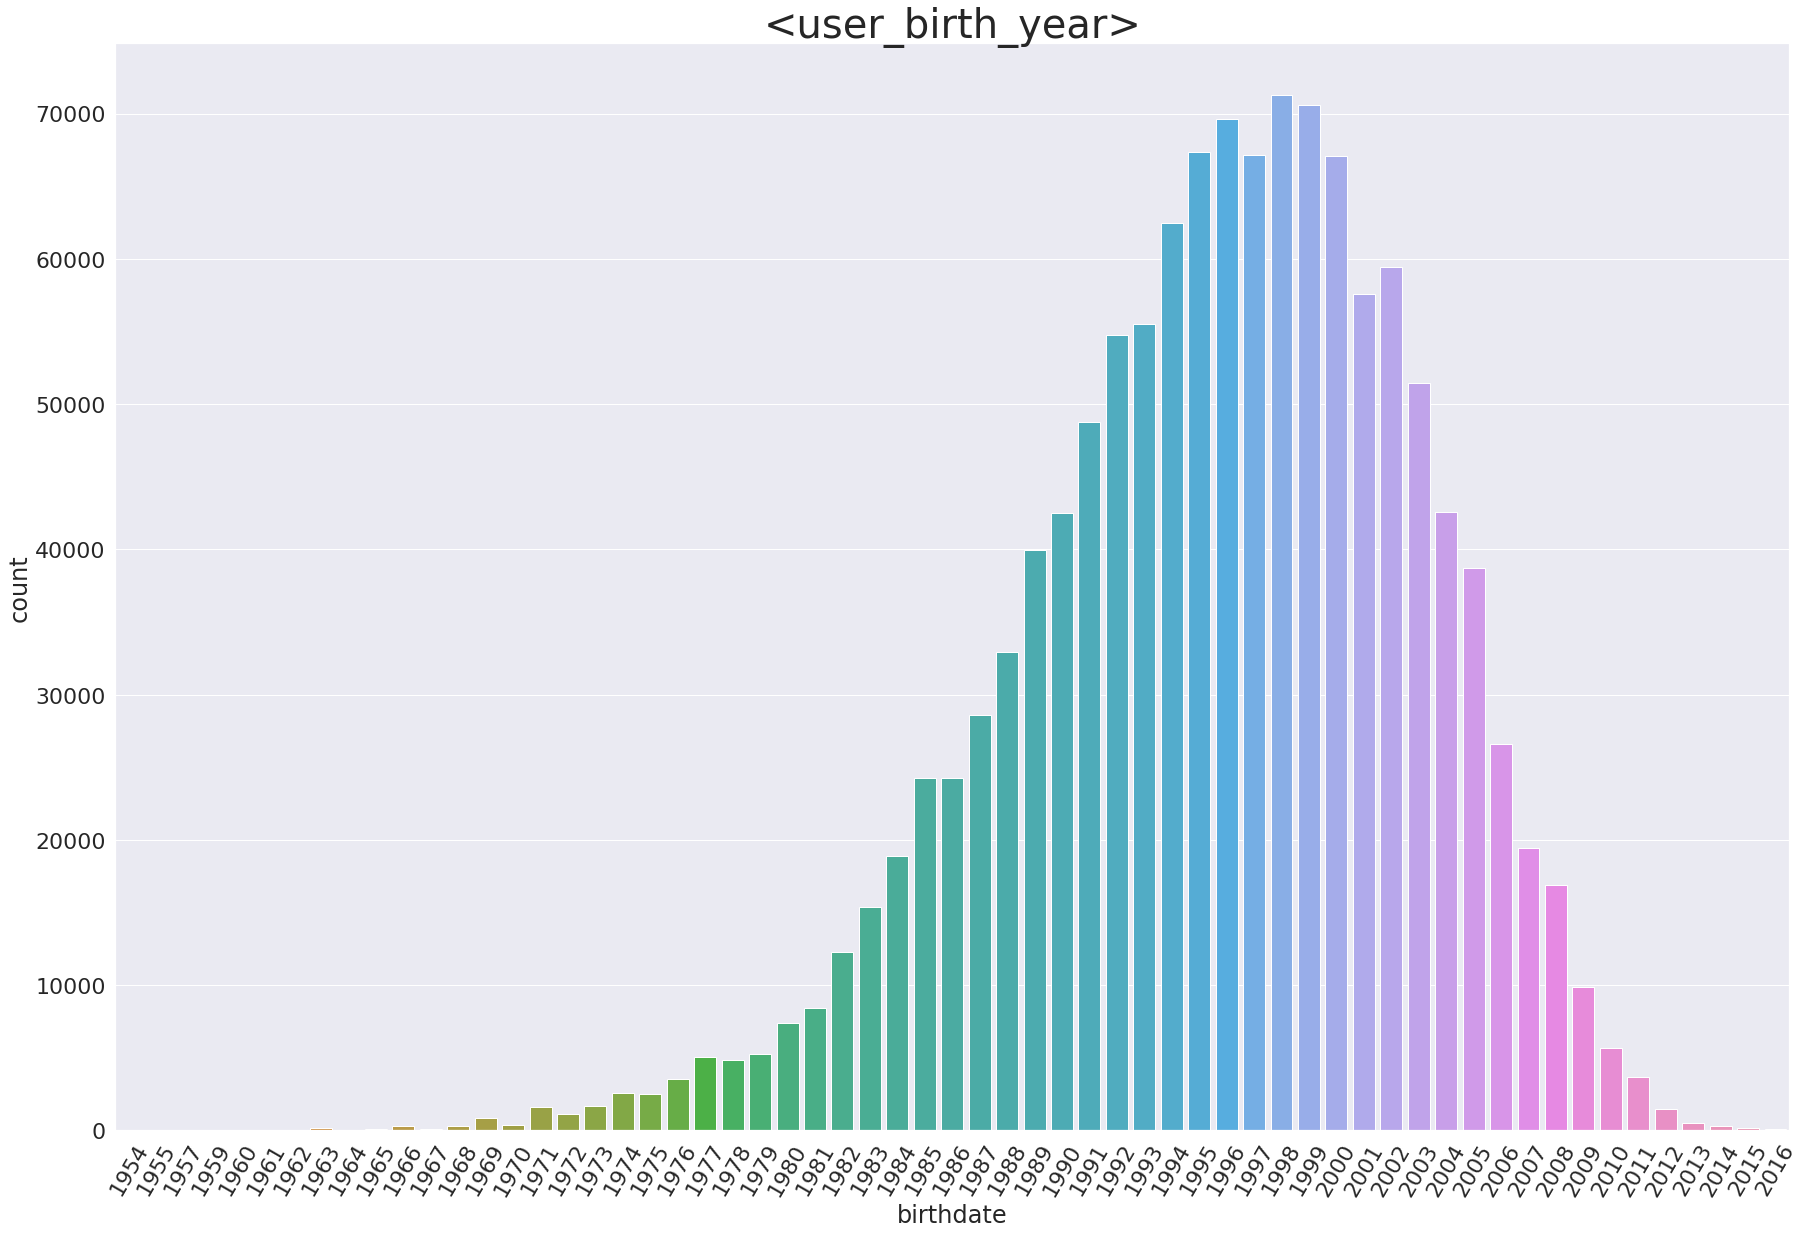

In [ ]:
sns.set(font_scale = 2)
plt.figure(figsize=(30,20))
sns.countplot(birth)
plt.title('<user_birth_year>',size=40)
plt.xticks(rotation=60)